## Ravi Edla - US Housing Company Assignment

### Problem Statement

#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

#### The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

In [295]:
# Suppress the warnings

import warnings
warnings.filterwarnings('ignore')

## Importing the required libraries

In [296]:
## Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(100)
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
pd.set_option("display.max_columns",400)
%matplotlib inline

## Loading the File

In [297]:
#Loading the train CSV File
housing_data=pd.read_csv(r"./train.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Basic sanity checks

In [298]:
housing_data.shape

(1460, 81)

In [299]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [300]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [301]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [302]:
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [303]:
#checking the target variables
housing_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

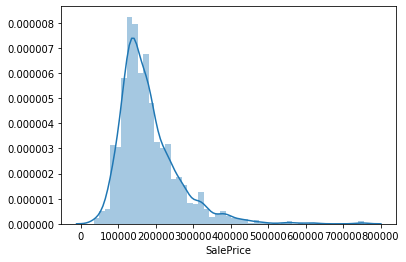

In [304]:
sns.distplot(housing_data["SalePrice"])

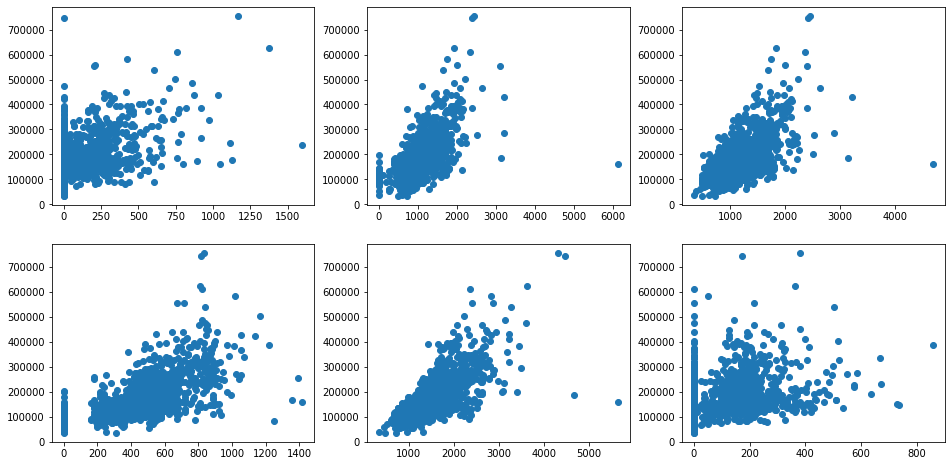

In [305]:
#Plotting some features against target variable to see pattern
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(housing_data.MasVnrArea,housing_data.SalePrice)
plt.subplot(2,3,2)
plt.scatter(housing_data.TotalBsmtSF,housing_data.SalePrice)
plt.subplot(2,3,3)
plt.scatter(housing_data['1stFlrSF'],housing_data.SalePrice)
plt.subplot(2,3,4)
plt.scatter(housing_data['GarageArea'],housing_data.SalePrice)
plt.subplot(2,3,5)
plt.scatter(housing_data['GrLivArea'],housing_data.SalePrice)
plt.subplot(2,3,6)
plt.scatter(housing_data['WoodDeckSF'],housing_data.SalePrice)

In [306]:
# checking all numeric (float and int) variables in the dataset
housing_number = housing_data.select_dtypes(include=['float64', 'int64'])
housing_number.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [307]:
housing_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

Although some variables are numeric here, we'd rather treat them as categorical since they have discrete values.

In [308]:
# dropping the columns we want to treat as categorical variables
housing_number = housing_number.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
housing_number.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


## Identifying Outliers

In [309]:
housing_number.describe(percentiles=[.10,.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
10%,146.900000,44.000000,5000.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106475.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.100000,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.050000,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000


In [310]:
# making list of column those have outliers 
outliers_cols = ['PoolArea','MiscVal','ScreenPorch','LotArea','MasVnrArea','SalePrice']
housing_data[outliers_cols].describe(percentiles=[.10,.25,.5,.75,.90,.95,.99])

,PoolArea,MiscVal,ScreenPorch,LotArea,MasVnrArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000
mean,2.758904,43.489041,15.060959,10516.828082,103.685262,180921.195890
std,40.177307,496.123024,55.757415,9981.264932,181.066207,79442.502883
min,0.000000,0.000000,0.000000,1300.000000,0.000000,34900.000000
10%,0.000000,0.000000,0.000000,5000.000000,0.000000,106475.000000
25%,0.000000,0.000000,0.000000,7553.500000,0.000000,129975.000000
50%,0.000000,0.000000,0.000000,9478.500000,0.000000,163000.000000
75%,0.000000,0.000000,0.000000,11601.500000,166.000000,214000.000000
90%,0.000000,0.000000,0.000000,14381.700000,335.000000,278000.000000
95%,0.000000,0.000000,160.000000,17401.150000,456.000000,326100.000000


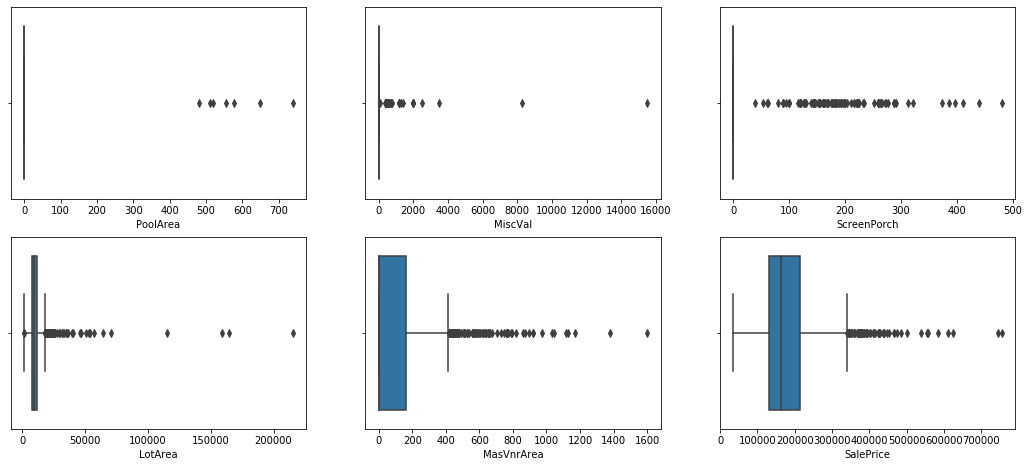

In [311]:
#plotting outlier
plt.figure(figsize = (18,12) )
for i in enumerate(outliers_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data= housing_data)

## Outlier treatment

In [312]:
QTR1 = housing_data['PoolArea'].quantile(0.05)
QTR3 = housing_data['PoolArea'].quantile(0.95)
IQTR = QTR3 - QTR1
housing_data = housing_data[(housing_data['PoolArea'] >= QTR1) & (housing_data['PoolArea'] <= QTR3)]

In [313]:
QTR1 = housing_data['MiscVal'].quantile(0.05)
QTR3 = housing_data['MiscVal'].quantile(0.95)
IQTR = QTR3 - QTR1
housing_data = housing_data[(housing_data['MiscVal'] >= QTR1) & (housing_data['MiscVal'] <= QTR3)]

In [314]:
QTR1 = housing_data['ScreenPorch'].quantile(0.05)
QTR3 = housing_data['ScreenPorch'].quantile(0.95)
IQTR = QTR3 - QTR1
housing_data = housing_data[(housing_data['ScreenPorch'] >= QTR1) & (housing_data['ScreenPorch'] <= QTR3)]

In [315]:
QTR1 = housing_data['LotArea'].quantile(0.05)
QTR3 = housing_data['LotArea'].quantile(0.95)
IQTR = QTR3 - QTR1
housing_data = housing_data[(housing_data['LotArea'] >= QTR1) & (housing_data['LotArea'] <= QTR3)]

In [316]:
QTR1 = housing_data['MasVnrArea'].quantile(0.05)
QTR3 = housing_data['MasVnrArea'].quantile(0.95)
IQTR = QTR3 - QTR1
housing_data = housing_data[(housing_data['MasVnrArea'] >= QTR1) & (housing_data['MasVnrArea'] <= QTR3)]

In [317]:
QTR1 = housing_data['SalePrice'].quantile(0.05)
QTR3 = housing_data['SalePrice'].quantile(0.95)
IQTR = QTR3 - QTR1
housing_data = housing_data[(housing_data['SalePrice'] >= QTR1) & (housing_data['SalePrice'] <= QTR3)]

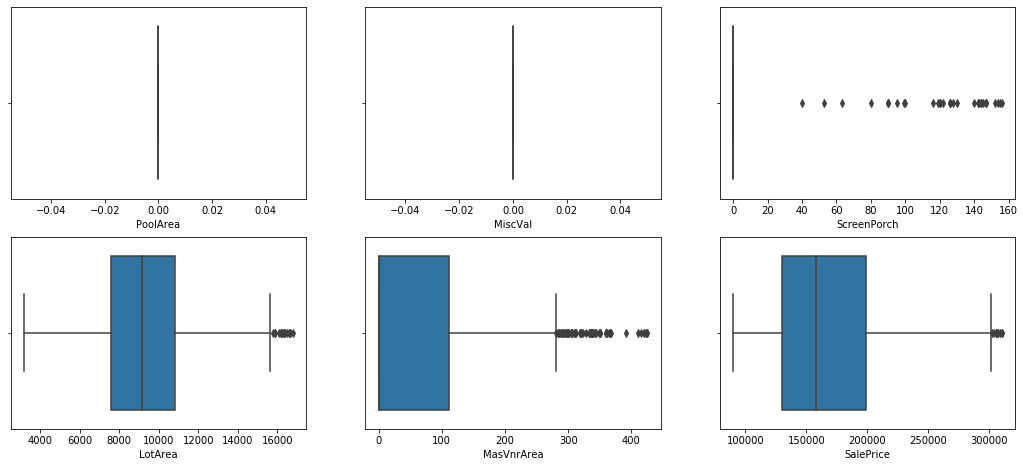

In [318]:
plt.figure(figsize = (18,12) )
for i in enumerate(outliers_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data= housing_data)

In [319]:
# correlation matrix
Corr = housing_number.corr()
Corr

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.010601,-0.033226,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917
LotFrontage,-0.010601,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,-0.033226,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,-0.050298,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,-0.015415,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.010496,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.005590,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334


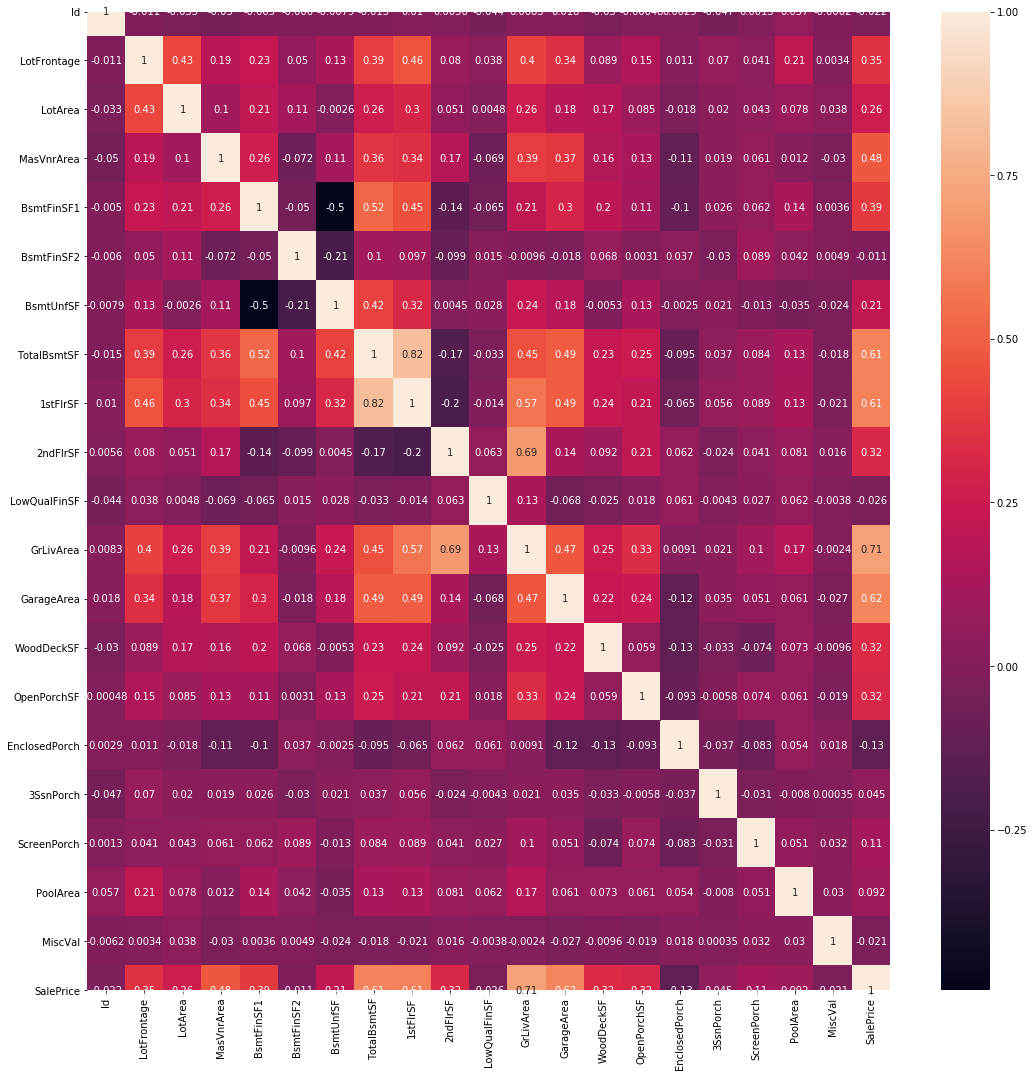

In [320]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,18))

# heatmap
sns.heatmap(Corr, annot=True)
plt.show()

In [321]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 0 to 1459
Data columns (total 81 columns):
Id               1021 non-null int64
MSSubClass       1021 non-null int64
MSZoning         1021 non-null object
LotFrontage      847 non-null float64
LotArea          1021 non-null int64
Street           1021 non-null object
Alley            64 non-null object
LotShape         1021 non-null object
LandContour      1021 non-null object
Utilities        1021 non-null object
LotConfig        1021 non-null object
LandSlope        1021 non-null object
Neighborhood     1021 non-null object
Condition1       1021 non-null object
Condition2       1021 non-null object
BldgType         1021 non-null object
HouseStyle       1021 non-null object
OverallQual      1021 non-null int64
OverallCond      1021 non-null int64
YearBuilt        1021 non-null int64
YearRemodAdd     1021 non-null int64
RoofStyle        1021 non-null object
RoofMatl         1021 non-null object
Exterior1st      1021 non-nu

## Data Cleaning

In [322]:
# observing number of null values in housing data
housing_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      174
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [323]:
# missing value in perentage
round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.04
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

# Treating Null Values

In [324]:
housing_data['Alley'].fillna('No Alley', inplace=True)
housing_data['MasVnrType'].fillna('None', inplace=True) 
housing_data['FireplaceQu'].fillna('No Fireplace', inplace=True)
housing_data['PoolQC'].fillna('No Pool', inplace=True)
housing_data['Fence'].fillna('No Fence', inplace=True) 
housing_data['MasVnrArea'].fillna(0, inplace=True) 
housing_data['LotFrontage'].fillna(0, inplace=True) 
housing_data['GarageType'].fillna('No Garage', inplace=True) 
housing_data['GarageFinish'].fillna('No Garage', inplace=True) 
housing_data['GarageQual'].fillna('No Garage', inplace=True) 
housing_data['GarageCond'].fillna('No Garage', inplace=True)

In [325]:
# We drop MiscFeature column as it has 99% null values
housing_data= housing_data.drop('MiscFeature', axis=1)

In [326]:
housing_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [327]:
#converting year to number of years
housing_data['YearBuilt'] = 2020 - housing_data['YearBuilt']
housing_data['YearRemodAdd'] = 2020 - housing_data['YearRemodAdd']
housing_data['GarageYrBlt'] = 2020 - housing_data['GarageYrBlt']
housing_data['YrSold'] = 2020 - housing_data['YrSold']

In [328]:
#converting from int type to object to treat the variables as categorical variables
housing_data['MSSubClass'] = housing_data['MSSubClass'].astype('object')
housing_data['OverallQual'] = housing_data['OverallQual'].astype('object')
housing_data['OverallCond'] = housing_data['OverallCond'].astype('object')
housing_data['BsmtFullBath'] = housing_data['BsmtFullBath'].astype('object')
housing_data['BsmtHalfBath'] = housing_data['BsmtHalfBath'].astype('object')
housing_data['FullBath'] = housing_data['FullBath'].astype('object')
housing_data['HalfBath'] = housing_data['HalfBath'].astype('object')
housing_data['BedroomAbvGr'] = housing_data['BedroomAbvGr'].astype('object')
housing_data['KitchenAbvGr'] = housing_data['KitchenAbvGr'].astype('object')
housing_data['TotRmsAbvGrd'] = housing_data['TotRmsAbvGrd'].astype('object')
housing_data['Fireplaces'] = housing_data['Fireplaces'].astype('object')
housing_data['GarageCars'] = housing_data['GarageCars'].astype('object')

In [329]:
housing_data.shape

(1021, 80)

In [330]:
fin_housing_data=housing_data

In [331]:
# List of variables to map

Var1 =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
fin_housing_data[Var1] = fin_housing_data[Var1].apply(binary_map)

In [332]:
# List of variables to map

Var2 =  ['Utilities']

# Defining the map function
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
fin_housing_data[Var2] = fin_housing_data[Var2].apply(binary_map)

In [333]:
# List of variables to map

var3 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
fin_housing_data[var3] = fin_housing_data[var3].apply(binary_map)

In [334]:
# split into X and y
X = fin_housing_data.drop(['Id'], axis=1)

##  Creating dummy variables

In [335]:
# subset all categorical variables
Housing_Cat = X.select_dtypes(include=['object'])
Housing_Cat.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [336]:
# converting into dummies
Housing_Dummy = pd.get_dummies(Housing_Cat, drop_first=True)
Housing_Dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,Sa

In [337]:
# drop categorical variables and keep dummies
fin_housing_data = fin_housing_data.drop(list(Housing_Cat.columns), axis=1)

In [338]:
# concat dummy variables with X
fin_housing_data = pd.concat([fin_housing_data, Housing_Dummy], axis=1)

In [339]:
fin_housing_data.shape

(1021, 282)

In [340]:
test = fin_housing_data.tail(1021)

In [341]:
X = fin_housing_data.head(1021)
y = np.log(X.SalePrice)
X = X.drop("SalePrice",1)

In [342]:
test = test.fillna(test.interpolate())
X = X.fillna(X.interpolate())
X = X.fillna(X.interpolate())
test = test.drop("SalePrice",1)

## Scaling of features

In [343]:
# Using standard scaler 
Scaler = StandardScaler()
Scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Splitting into training and Test data set

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [345]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9168171609147303
0.9113575607481815


In [346]:
Params = list(lm.coef_)
Params.insert(0,lm.intercept_)
Params = [round(x,3) for x in Params]
Cols = X_train.columns
Cols.insert(0,'Constant')
list(zip(Cols,Params))

[('Id', 11.284),
 ('LotFrontage', -0.0),
 ('LotArea', -0.0),
 ('Street', 0.0),
 ('Utilities', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', -0.003),
 ('MasVnrArea', -0.001),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.027),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', -0.0),
 ('GarageYrBlt', 0.0),
 ('GarageArea', -0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.0),
 ('YrSold', 0.001),
 ('MSSubClass_30', 0.001),
 ('MSSubClass_40', -0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', 0.0),
 ('MSSubClass_60', 0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_75', 0.035),
 ('MSSubClass_80', -0.0),
 ('MSSubClass_85', 0.0),
 ('MSSubClass_90', 0.0),
 ('MSSubClass_120', -0.0),
 ('MSSubClass_160', 0.0),
 ('MSSubClass_180', -0.006),
 ('MSSubClass_190', 0.0),
 ('MSZoning_FV', -0.0),
 ('M

In [347]:
#Model modification with the optimal value of alpha using GridSearchCV
Folds = KFold(n_splits=10,shuffle=True,random_state=42)

Hyper_Params = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

Model = Lasso()

Model_CV = GridSearchCV(estimator = Model,
                        param_grid=Hyper_Params,
                        scoring='r2',
                        cv=Folds,
                        verbose=1,
                        return_train_score=True
                       )

Model_CV.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [348]:
CV_Result_L = pd.DataFrame(Model_CV.cv_results_)
CV_Result_L['param_alpha'] = CV_Result_L['param_alpha'].astype('float32')
CV_Result_L.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.018251,0.004001,0.001952,0.000437,0.001,{'alpha': 0.001},0.875290,0.894222,0.920340,0.833173,0.892833,0.862273,0.906580,0.906742,0.910797,0.890838,0.889261,0.024841,1,0.920043,0.917047,0.915622,0.923593,0.919001,0.922223,0.916832,0.918234,0.916550,0.918292,0.918744,0.002427
1,0.010736,0.004299,0.001659,0.000447,0.010,{'alpha': 0.01},0.803439,0.811532,0.839046,0.775940,0.841722,0.749124,0.864927,0.847603,0.863091,0.792202,0.818799,0.036745,2,0.836705,0.831187,0.832644,0.837861,0.832219,0.837455,0.827056,0.832141,0.832185,0.835327,0.833478,0.003179
2,0.022058,0.005420,0.001366,0.000478,0.100,{'alpha': 0.1},0.796478,0.803270,0.832383,0.763781,0.839683,0.737088,0.851169,0.834846,0.865609,0.773635,0.809734,0.039674,3,0.824785,0.823167,0.820951,0.826904,0.820037,0.830502,0.816965,0.820473,0.817072,0.825885,0.822674,0.004158
3,0.008784,0.000873,0.001074,0.000293,1.000,{'alpha': 1.0},0.725204,0.787591,0.821104,0.761309,0.819090,0.684453,0.786531,0.787346,0.822406,0.723165,0.771831,0.044909,4,0.783739,0.785045,0.781418,0.788813,0.780529,0.789545,0.778101,0.782259,0.777123,0.787776,0.783435,0.004123
4,0.007611,0.000954,0.001269,0.000447,5.000,{'alpha': 5.0},0.519328,0.664243,0.689200,0.637824,0.711327,0.522377,0.601483,0.671591,0.674801,0.509035,0.620163,0.073029,5,0.643578,0.622236,0.623593,0.630410,0.622131,0.644211,0.631829,0.629668,0.627816,0.638231,0.631370,0.007791


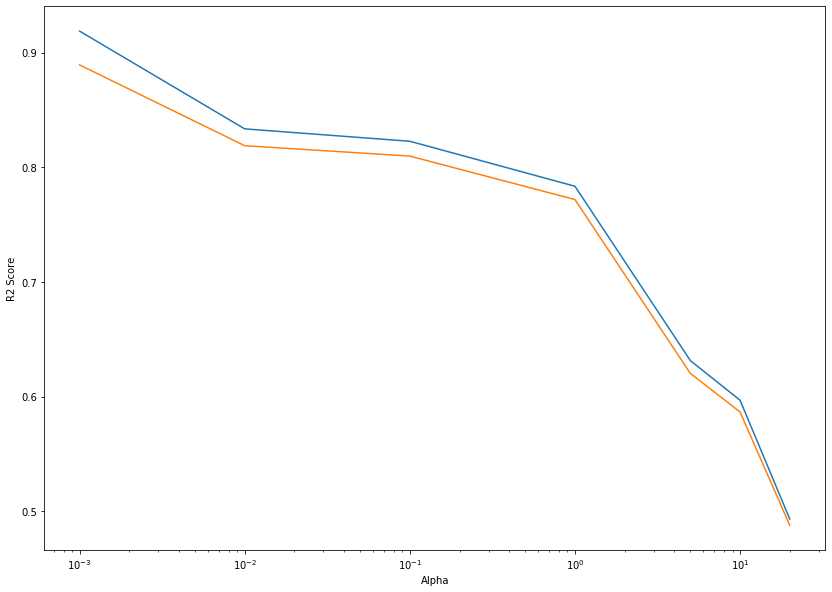

In [349]:
# Graph plotting R2-Score and alpha for both test and train
plt.figure(figsize=(14,10))
plt.plot(CV_Result_L['param_alpha'],CV_Result_L['mean_train_score'])
plt.plot(CV_Result_L['param_alpha'],CV_Result_L['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [350]:
# Checking the best Alpha value 
Model_CV.best_params_

{'alpha': 0.001}

In [351]:
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9168171609147303
0.9113575607481815


In [352]:
Model_Param = list(lasso.coef_)
Model_Param.insert(0,lasso.intercept_)
Cols_1 = X_train.columns
Cols_1.insert(0,'const')
Lasso_Coeff = pd.DataFrame(list(zip(Cols_1,Model_Param)))
Lasso_Coeff.columns = ['Features','Coefficients']

In [353]:
## Dropping Id row since it is not useful in predictions
Lasso_Coeff.drop([0], axis=0, inplace=True)

In [354]:
Lasso_Coeff.sort_values(by='Coefficients',ascending=False).head(10)

,Features,Coefficients
64,Neighborhood_Edwards,0.085876
231,Fireplaces_1,0.075695
110,OverallQual_9,0.072353
211,KitchenAbvGr_2,0.071201
61,Neighborhood_ClearCr,0.061458
79,Neighborhood_StoneBr,0.056206
109,OverallQual_8,0.043314
116,OverallCond_8,0.040869
127,Exterior1st_CBlock,0.040797
34,MSSubClass_75,0.034506


## Modelling with RIDGE Regression

In [355]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9604698595566997
0.8555914574323169


By seeing above diffrence between test and train data we can state that value of alpha is not correct.

In [356]:
#Model modification with the optimal value of alpha using GridSearchCV
Folds  = KFold(n_splits=10,shuffle=True,random_state=42)

Hyper_Params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

Model = Ridge()

Model_CV = GridSearchCV(estimator=Model,
                        param_grid=Hyper_Params,
                        scoring='r2',
                        cv=Folds,
                        verbose=1,
                        return_train_score=True)

Model_CV.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    2.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [357]:
CV_Result_Ridge = pd.DataFrame(Model_CV.cv_results_)
CV_Result_Ridge['param_alpha'] = CV_Result_Ridge['param_alpha'].astype('float32')
CV_Result_Ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007906,0.000683,0.001561,0.000478,0.0001,{'alpha': 0.0001},0.852955,0.847470,0.894295,0.732397,0.840390,0.740269,0.914237,0.839367,0.908418,0.843328,0.841259,0.059072,27,0.964437,0.962885,0.962054,0.965916,0.963241,0.965452,0.960563,0.962802,0.961980,0.962572,0.963190,0.001562
1,0.006930,0.001019,0.001659,0.000447,0.0010,{'alpha': 0.001},0.852930,0.847823,0.894492,0.733074,0.840894,0.740549,0.915643,0.840168,0.909473,0.844300,0.841879,0.059213,26,0.964435,0.962882,0.962051,0.965914,0.963240,0.965452,0.960560,0.962801,0.961977,0.962568,0.963188,0.001562
2,0.007125,0.001159,0.001366,0.000478,0.0100,{'alpha': 0.01},0.853783,0.851123,0.895658,0.738333,0.845347,0.743409,0.919780,0.846883,0.912566,0.851265,0.845753,0.058802,24,0.964372,0.962778,0.961940,0.965836,0.963197,0.965430,0.960465,0.962764,0.961884,0.962462,0.963113,0.001579
3,0.006442,0.000647,0.001562,0.000647,0.0500,{'alpha': 0.05},0.857741,0.860465,0.898772,0.753919,0.858069,0.755388,0.920230,0.863259,0.913098,0.866435,0.854670,0.054712,23,0.963890,0.962182,0.961398,0.965392,0.962716,0.965190,0.959964,0.962323,0.961392,0.961939,0.962639,0.001634
4,0.006146,0.000450,0.001463,0.000486,0.1000,{'alpha': 0.1},0.860371,0.866933,0.901356,0.766733,0.866725,0.767225,0.919594,0.872785,0.912845,0.875886,0.860977,0.050854,22,0.963191,0.961418,0.960701,0.964791,0.961996,0.964806,0.959318,0.961641,0.960747,0.961289,0.961990,0.001688


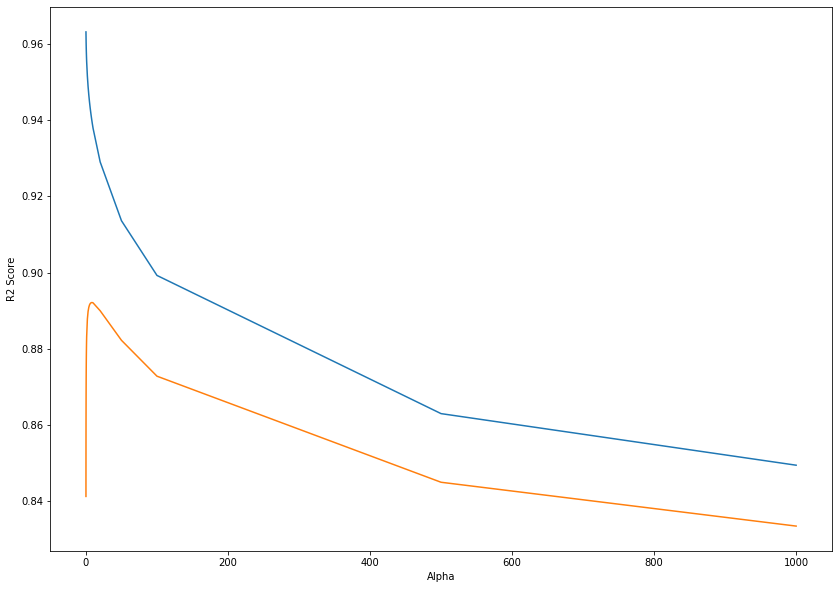

In [358]:
plt.figure(figsize=(14,10))
plt.plot(CV_Result_Ridge['param_alpha'],CV_Result_Ridge['mean_train_score'])
plt.plot(CV_Result_Ridge['param_alpha'],CV_Result_Ridge['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [359]:
# Checking the Alpha value best suited
Model_CV.best_params_

{'alpha': 8.0}

In [360]:
ridge = Ridge(alpha = 8)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9390772493495538
0.9201609481784042


In [361]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
Cols = X_train.columns
Cols.insert(0,'constant')
Ridge_Coeff = pd.DataFrame(list(zip(Cols,model_parameter)))
Ridge_Coeff.columns = ['Features','Coefficients']

In [362]:
## Dropping Id row since it is not useful in predictions
Ridge_Coeff.drop([0], axis=0, inplace=True)

In [363]:
Ridge_Coeff.sort_values(by='Coefficients',ascending=False).head(10)

,Features,Coefficients
64,Neighborhood_Edwards,0.073441
231,Fireplaces_1,0.069754
110,OverallQual_9,0.055445
117,OverallCond_9,0.051741
116,OverallCond_8,0.050745
61,Neighborhood_ClearCr,0.050502
79,Neighborhood_StoneBr,0.048503
211,KitchenAbvGr_2,0.046459
127,Exterior1st_CBlock,0.042377
118,RoofStyle_Gable,0.039220


### After compairing both the model we can see that

#### Best alpha value for Lasso : {'alpha': 0.001}

#### Best alpha value for Ridge : {'alpha': 8}